# House price forecasting

# Importing Necessary Libraries

In [3]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns
from dateutil import parser
import warnings
from scipy.special import boxcox1p
from statsmodels.stats import weightstats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

# Loding The Dataset and Dataset Exploration

In [6]:
df=pd.read_csv("house_data.csv")

In [7]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning and Data Reduction/Aggregation

In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
numeric_data = df.select_dtypes(include=[np.number]).columns
categorical_data = df.select_dtypes(exclude=[np.number]).columns

In [13]:
numeric_data

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df.price.agg(['min','max','count','mean','median','std'])

min       7.500000e+04
max       7.700000e+06
count     2.161300e+04
mean      5.400881e+05
median    4.500000e+05
std       3.671272e+05
Name: price, dtype: float64

In [16]:
df.price.mode()

0    350000.0
1    450000.0
Name: price, dtype: float64

In [17]:
df.price.mean()

540088.1417665294

# Feature Engineering (Extraction / Selection)

In [18]:
#Extracting Year from Date Column and Adding to DataFrame as a New Column
#The parser.parse function is used to convert the input date value into a datetime object
def parse_date(val):
    return parser.parse(val).year

df['yr_sold'] = df['date'].apply(parse_date)


In [19]:
#Calculating and Adding Property Age as a New Column in DataFrame
df['age'] = df['yr_sold'].values - df['yr_built'].values

In [20]:
df.drop('date',axis=1,inplace=True)

In [21]:
#showing data with new feature
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,5
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,11


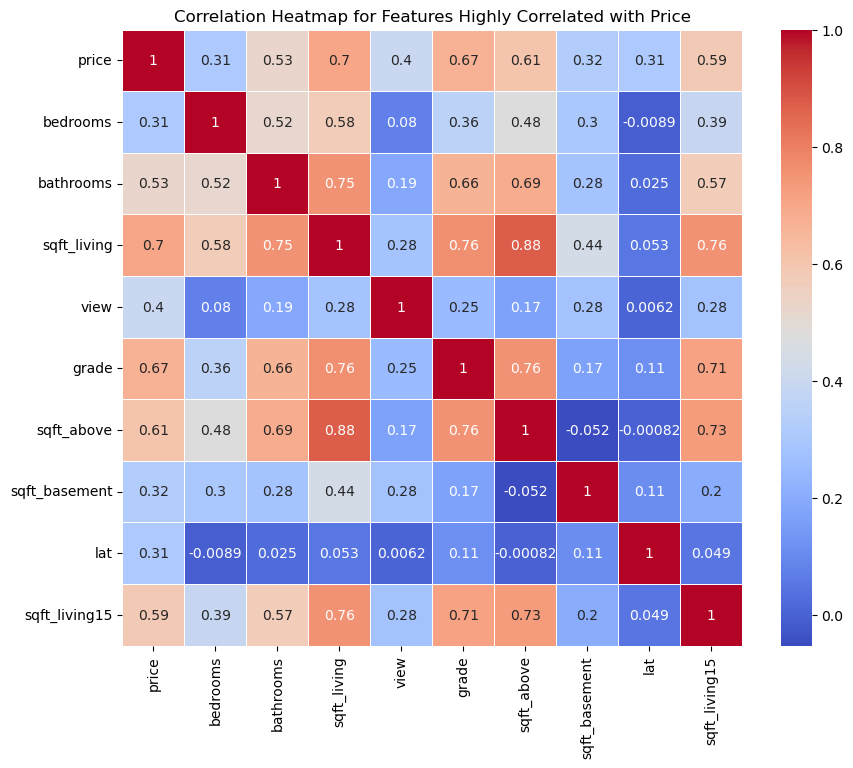

In [22]:


# Calculate correlations between features
correlation_matrix = df.corr()

# Select highly correlated features with "price"
highly_correlated_features = correlation_matrix['price'][abs(correlation_matrix['price']) > 0.3]

# Create a heatmap for highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df[highly_correlated_features.index].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Features Highly Correlated with Price')
plt.show()
#['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'lat', 'sqft_basement', 'sqft_living15']

# Statistical Analysis and Data Visualising

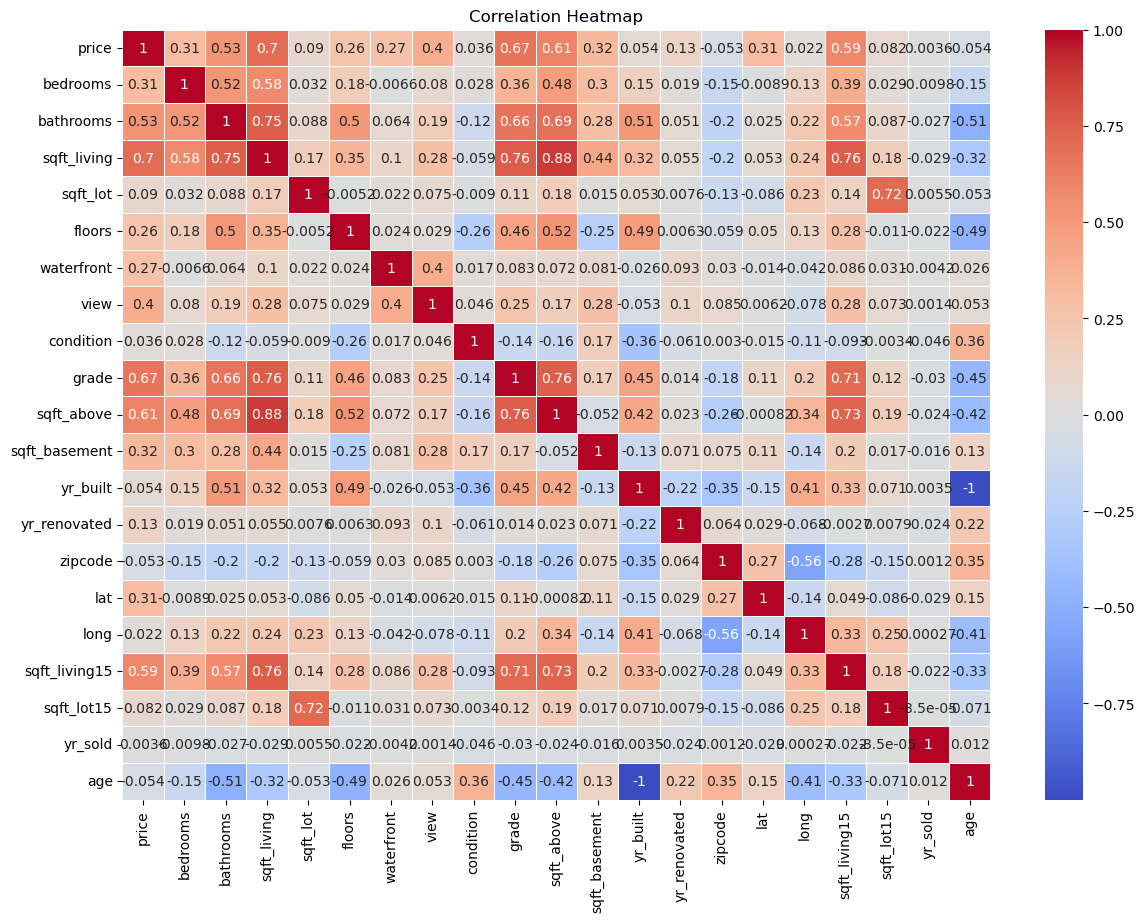

In [23]:


# Calculate correlations between features
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
#Calculating and Printing Skewness for Numeric Columns in the DataFrame
numeric_data = df.select_dtypes(include=[np.number])

# Calculate skewness for each numeric column
skewness = numeric_data.apply(skew)

print("Skewness for each numeric column:")
print(skewness)

Skewness for each numeric column:
price             4.023790
bedrooms          1.974163
bathrooms         0.511072
sqft_living       1.471453
sqft_lot         13.059113
floors            0.616134
waterfront       11.384318
view              3.395514
condition         1.032733
grade             0.771050
sqft_above        1.446564
sqft_basement     1.577856
yr_built         -0.469773
yr_renovated      4.549178
zipcode           0.405633
lat              -0.485237
long              0.884992
sqft_living15     1.108104
sqft_lot15        9.506083
yr_sold           0.757247
age               0.469130
dtype: float64


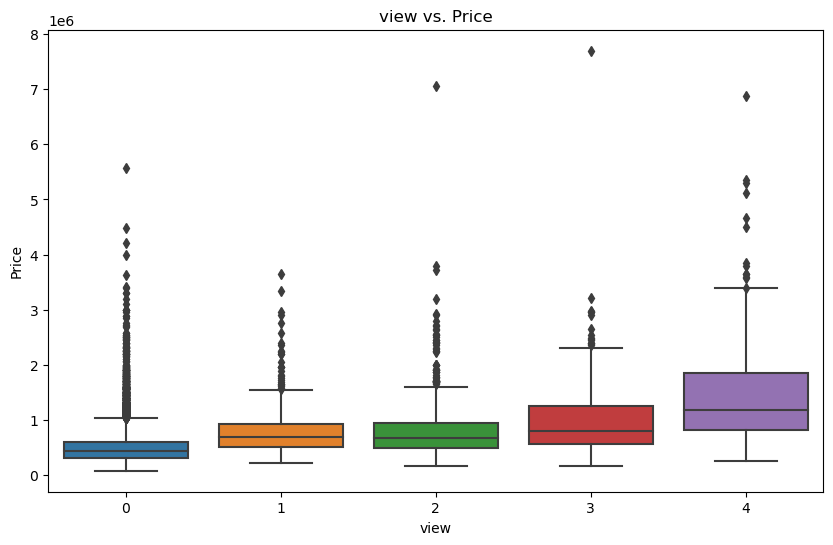

,view,price
view,1.000000,0.397293
price,0.397293,1.000000


In [25]:
#Higher Views Correspond to Higher Prices
# Box plot comparing view vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='view', y='price')
plt.xlabel('view')
plt.ylabel('Price')
plt.title('view vs. Price')
plt.show()
df[['view','price']].corr()


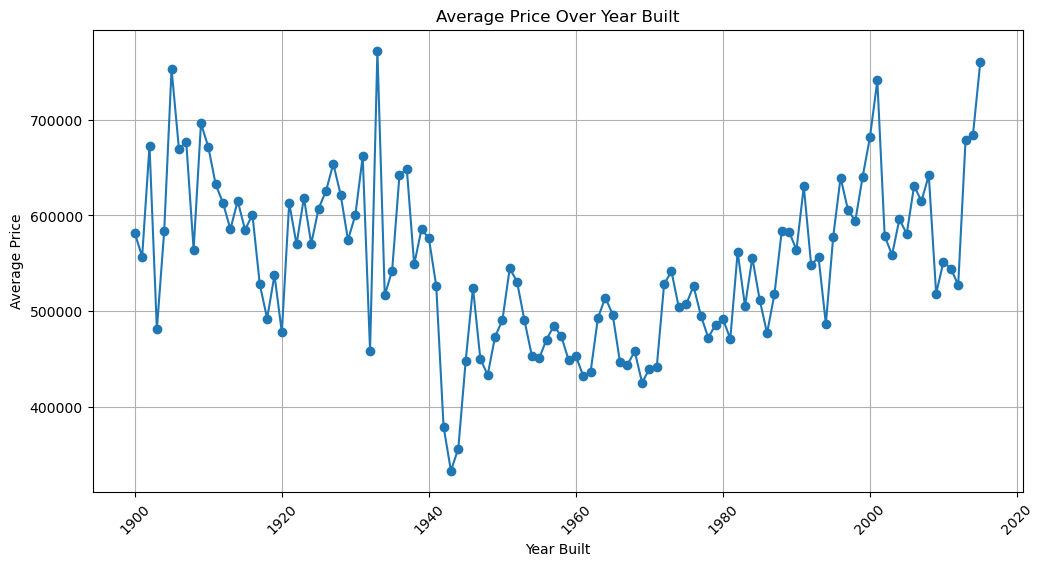

,yr_built,price
yr_built,1.000000,0.054012
price,0.054012,1.000000


In [26]:
# Grouping by year built and calculating average price
avg_price_by_year = df.groupby('yr_built')['price'].mean()

# Plotting average price over time
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.title('Average Price Over Year Built')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
df[['yr_built','price']].corr()

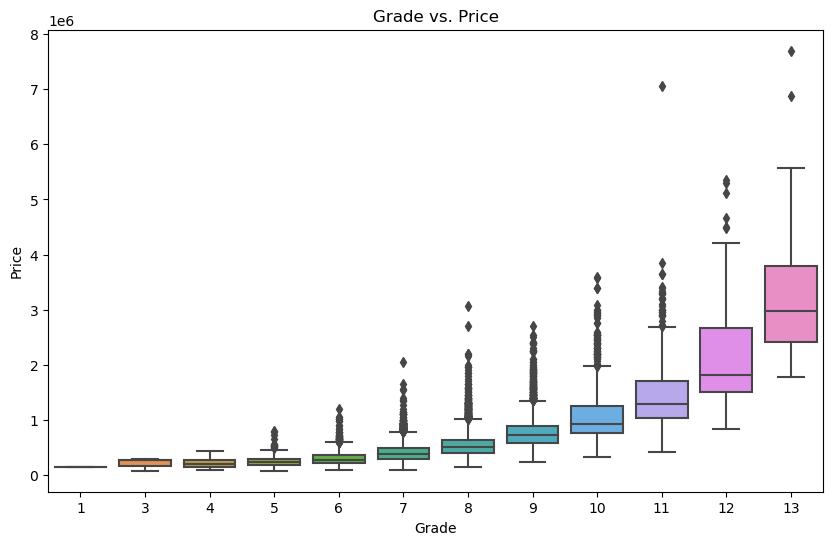

,grade,price
grade,1.000000,0.667434
price,0.667434,1.000000


In [27]:
#Higher Grades Correspond to Higher Prices
# Box plot comparing grade vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='grade', y='price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Grade vs. Price')
plt.show()
df[['grade','price']].corr()

In [28]:
# Outlier Counting Function
def count_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers.sum()

# Example usage
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'lat', 'sqft_basement', 'sqft_living15']

# Count and display outliers for each numeric feature
for feature in numeric_features:
    num_outliers = count_outliers(df[feature])
    print(f"Number of outliers in {feature}: {num_outliers}")


Number of outliers in bedrooms: 546
Number of outliers in bathrooms: 571
Number of outliers in sqft_living: 572
Number of outliers in sqft_above: 611
Number of outliers in lat: 2
Number of outliers in sqft_basement: 496
Number of outliers in sqft_living15: 544


In [29]:

# Transform skewed columns
numeric_data = df.select_dtypes(include=[np.number])
skewness = numeric_data.apply(skew)
high_skew_columns = skewness[skewness > 1.0].index

for column in high_skew_columns:
    numeric_data[column] = boxcox1p(numeric_data[column], 0.15)

# Display the transformed data
print(numeric_data.head())

       price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  \
0  35.583909  1.540963       1.00    12.597323  17.696152     1.0         0.0   
1  41.586543  1.540963       2.25    14.981646  18.620287     2.0         0.0   
2  34.278249  1.194318       1.00    11.403697  19.874209     1.0         0.0   
3  42.431400  1.820334       3.00    14.119786  17.253669     1.0         0.0   
4  41.201236  1.540963       2.00    13.644922  19.038978     1.0         0.0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0   0.0   1.540963      7  ...       0.000000      1955      0.000000   
1   0.0   1.540963      7  ...       9.715842      1951     14.168748   
2   0.0   1.540963      6  ...       0.000000      1933      0.000000   
3   0.0   2.055642      7  ...      11.861673      1965      0.000000   
4   0.0   1.540963      8  ...       0.000000      1987      0.000000   

   zipcode      lat     long  sqft_living15  sqft_lot15  yr_sold  age  
0 

In [30]:
def handling_outliers(df , display = False , drop = False , drop_order = 1 , columns_to_drop = []):
    
    numerical_columns = list((df.select_dtypes(include=np.number)).columns)


    if display == True :
        from math import ceil
        x = ceil(len(numerical_columns)/3)
        plt.figure(figsize=(15,25))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("Outliers Detection")
        for i in numerical_columns :
            y =  numerical_columns.index(i) + 1
            ax = plt.subplot(x, 3, y)
            ax = sns.boxplot(x = df[i] ,data = df)
            ax.set_title(i)
            
    if drop == True :
        
        if (len(columns_to_drop) != 0) :
            numerical_columns = columns_to_drop
            
        elif drop_order < 1 :
            drop_order = 1
            
        while drop_order != 0 :
            
            for i in numerical_columns :
                q1 = df[i].quantile(0.25)
                q3 = df[i].quantile(0.75)
                iqr = q3 - q1
                lower = q1 - 1.5*iqr
                if lower < 0 :
                    lower = 0
                higher = q3 + 1.5*iqr
                df = df [df[i] >= lower] 
                df = df [df[i] <= higher ]
            
            drop_order = drop_order - 1
    return df

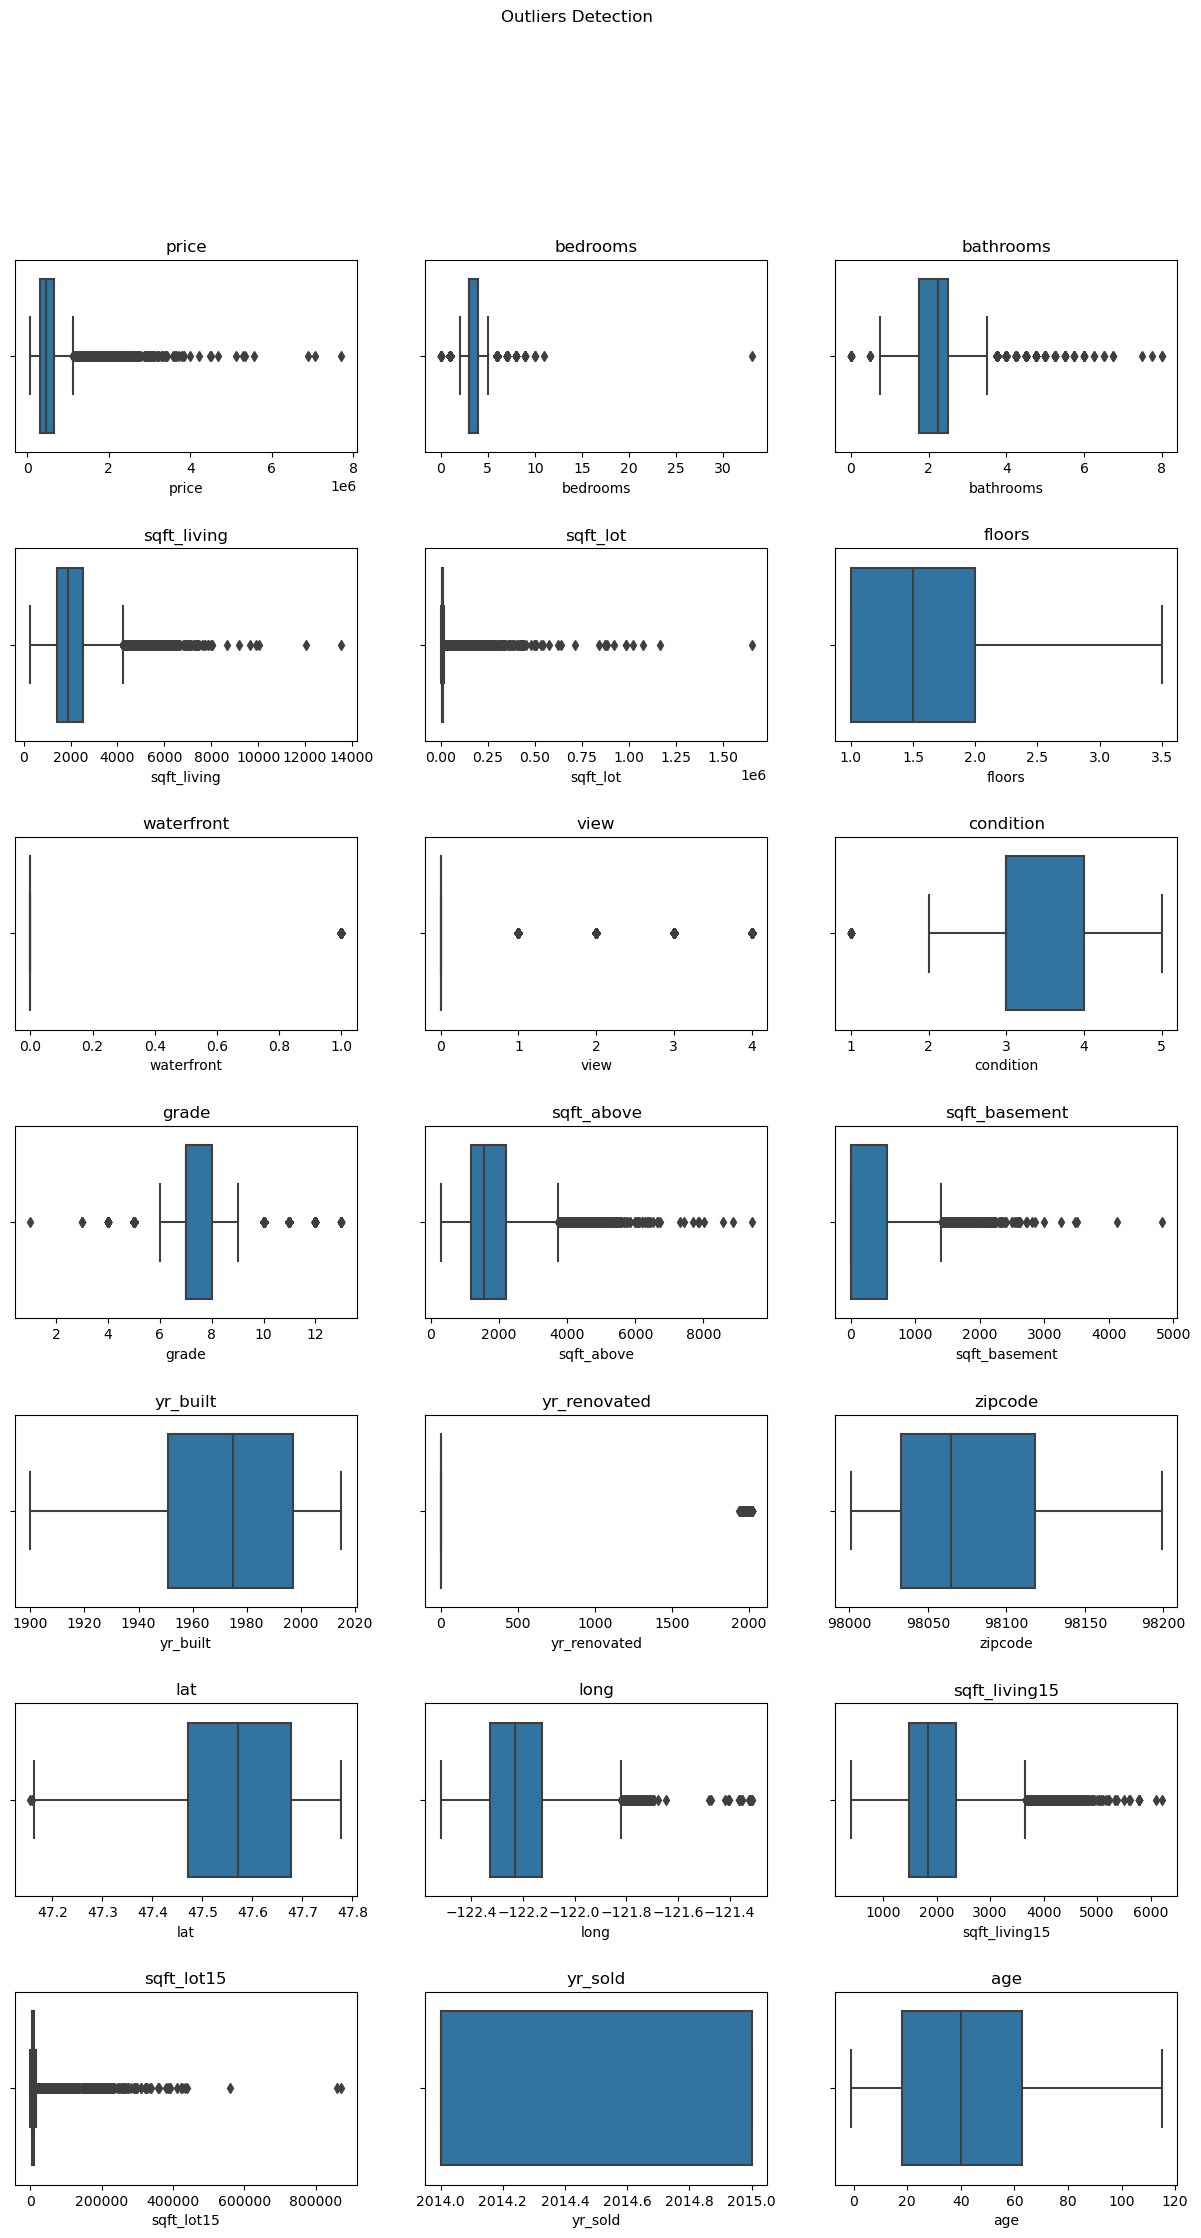

In [31]:
df_1 = handling_outliers(df , display= True , drop=True , drop_order=2 , columns_to_drop =['price','bedrooms','bathrooms'])

### After dropping just Specific Columns

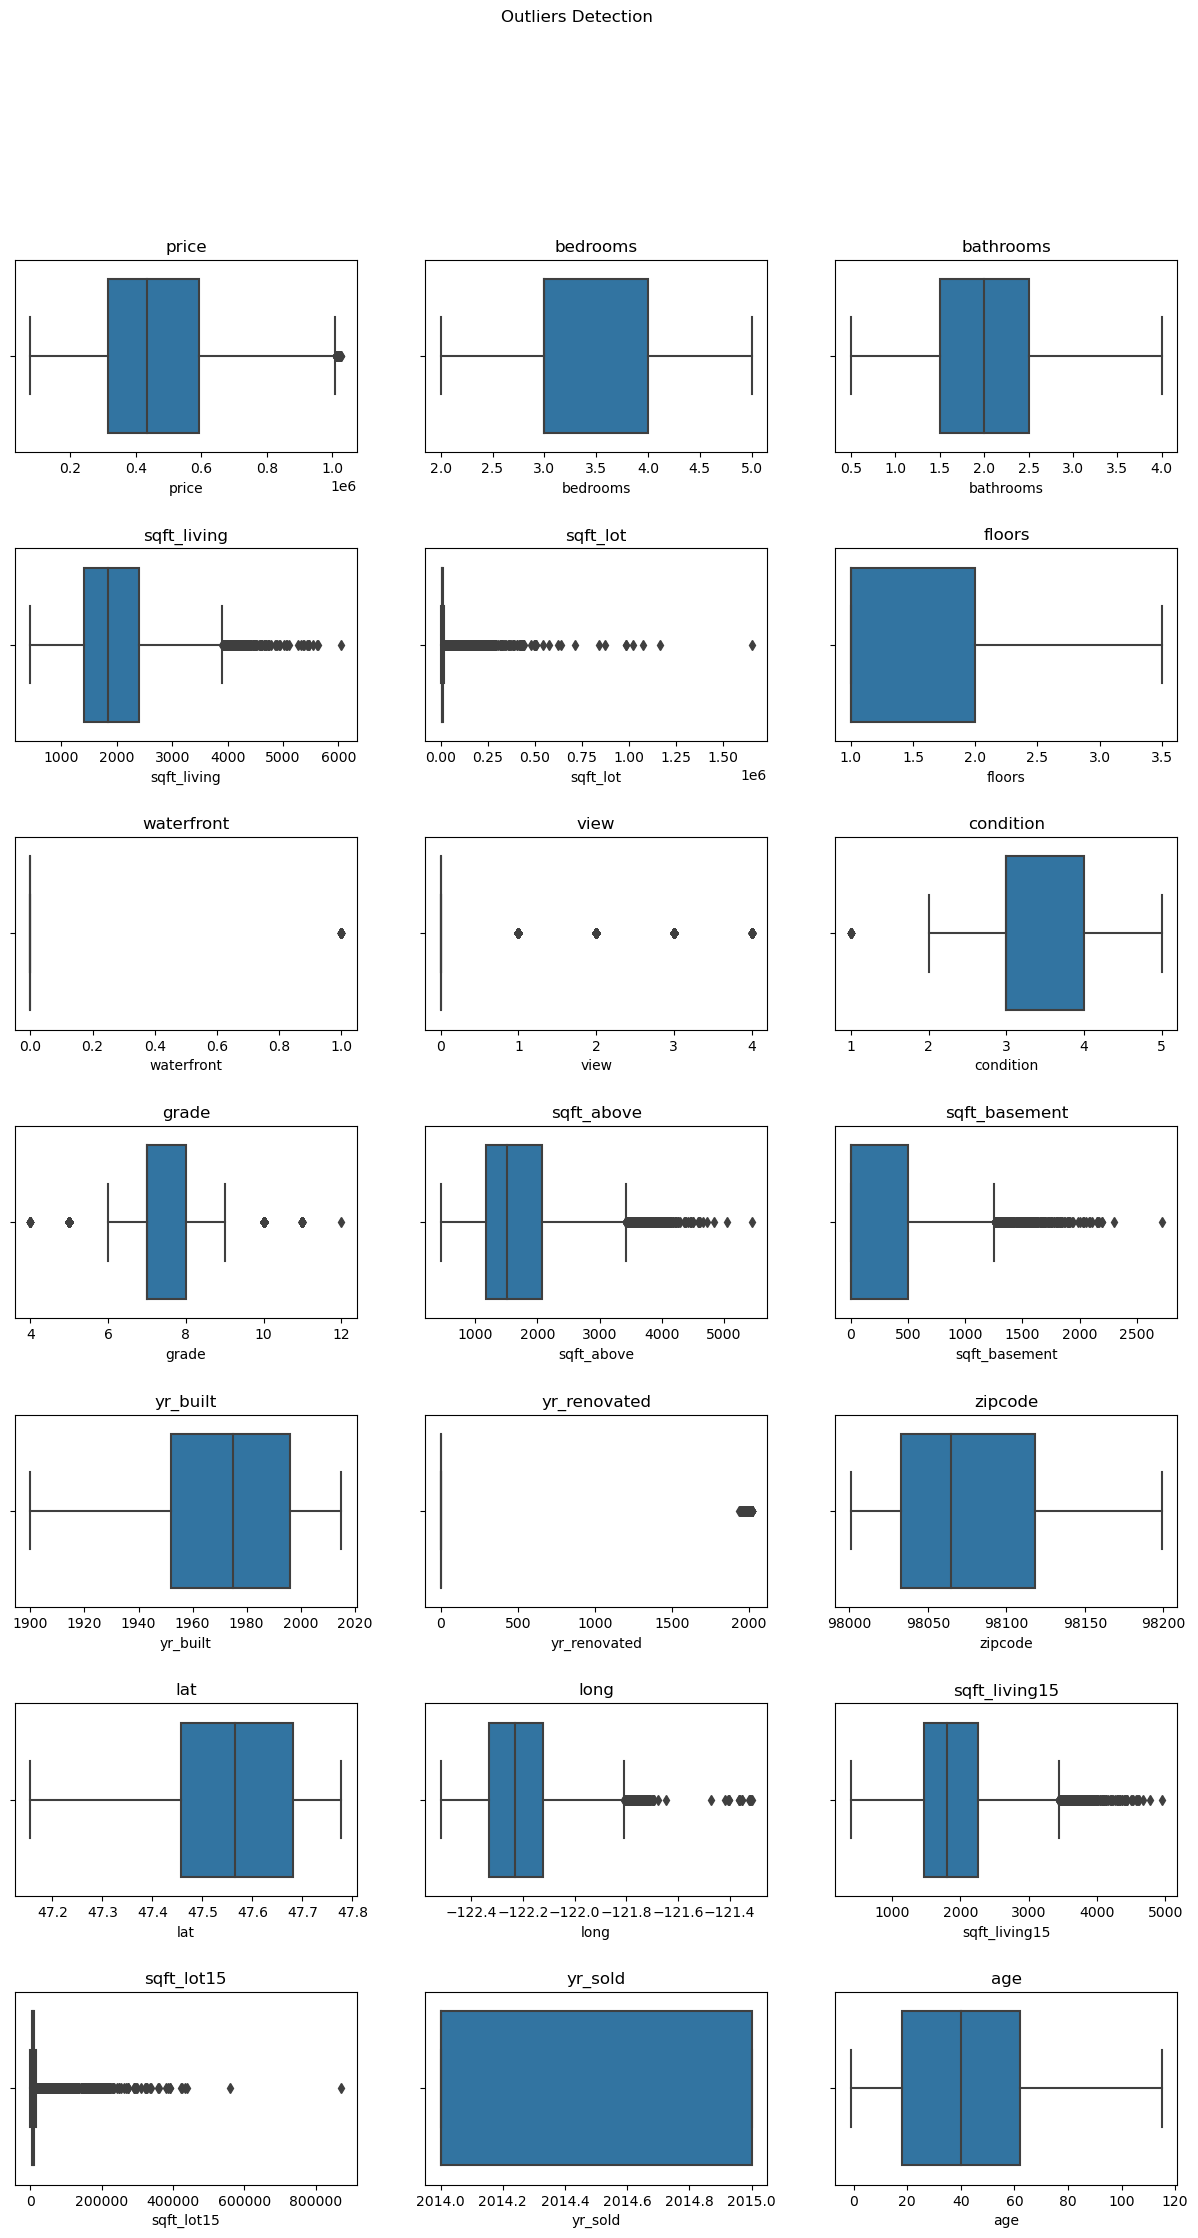

In [32]:
df_1 = handling_outliers(df_1 , display= True )

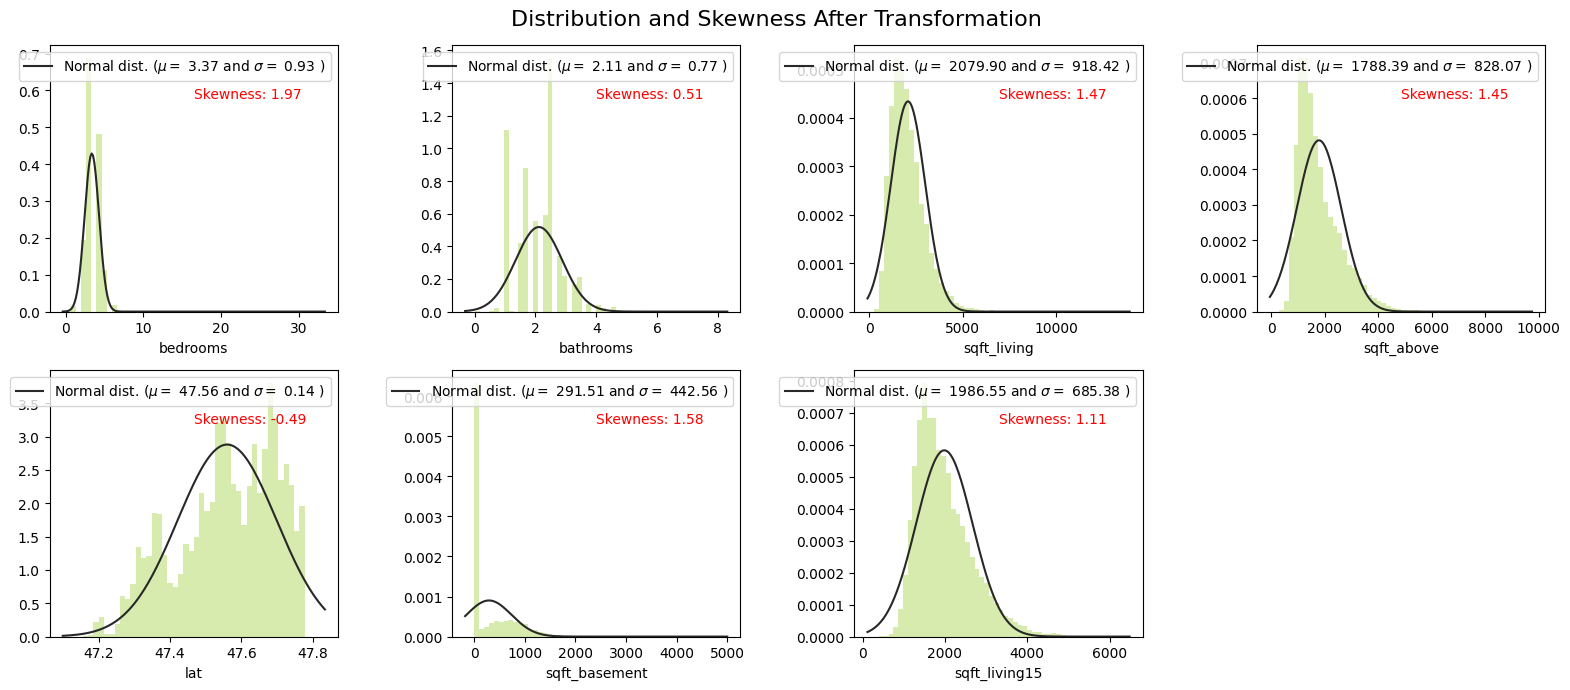

In [66]:



# Features to plot
list_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'lat', 'sqft_basement', 'sqft_living15']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
fig.suptitle("Distribution and Skewness After Transformation", fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through features and subplots
for i, feature in enumerate(list_col):
    plt.subplot(2,4 , i+1)
    sns.distplot(df[feature], fit=norm, kde=False, color='yellowgreen')

    # Calculate skewness and add it to the plot
    skewness = skew(df[feature])
    plt.text(0.50, 0.8, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, fontsize=10, color='red')

    (mu, sigma) = norm.fit(df[feature])
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.xlabel(feature)

# Remove the empty subplot if necessary
if len(list_col) < len(axes):
    fig.delaxes(axes[len(list_col)])
# Adjust layout
plt.tight_layout()
plt.show()


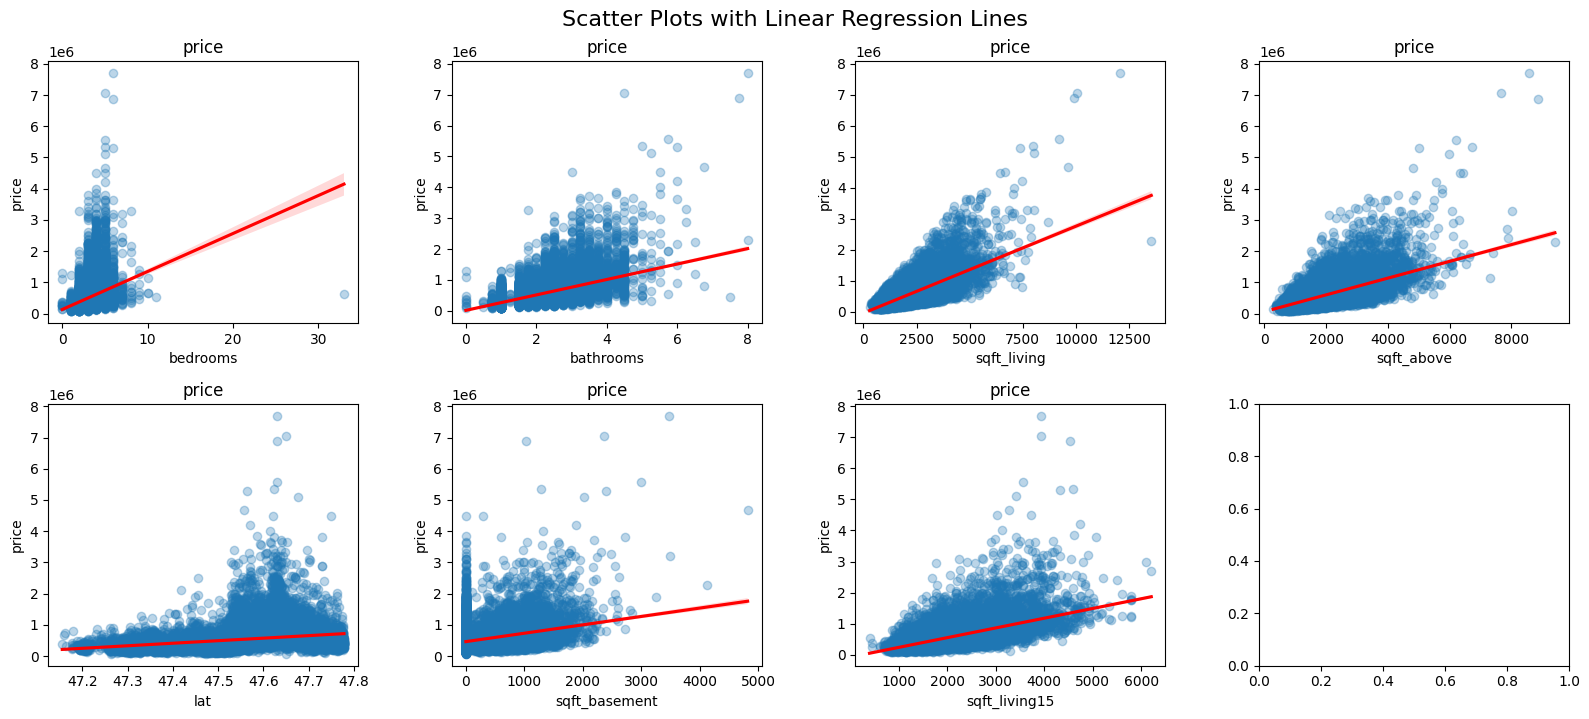

In [67]:


# Create a new figure with a specific size
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))

# Features to plot
features_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'lat', 'sqft_basement', 'sqft_living15']
# Iterate through the selected features and create scatter plots
for i, feature in enumerate(features_to_plot):
    # Create a subplot at position i+1 in a 3x3 grid
    ax = plt.subplot(2, 4, i+1)

    # Create a scatter plot with a linear regression line using Seaborn
    sns.regplot(data=df, x=df[feature], y='price', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

    # Set x-axis label and plot title
    plt.xlabel(feature)
    plt.title('price')

    # Adjust layout for better spacing between plots
    plt.tight_layout(w_pad=3)
# Customize overall layout
fig.suptitle("Scatter Plots with Linear Regression Lines", fontsize=16, y=1.02)
# Display the plots
plt.show()


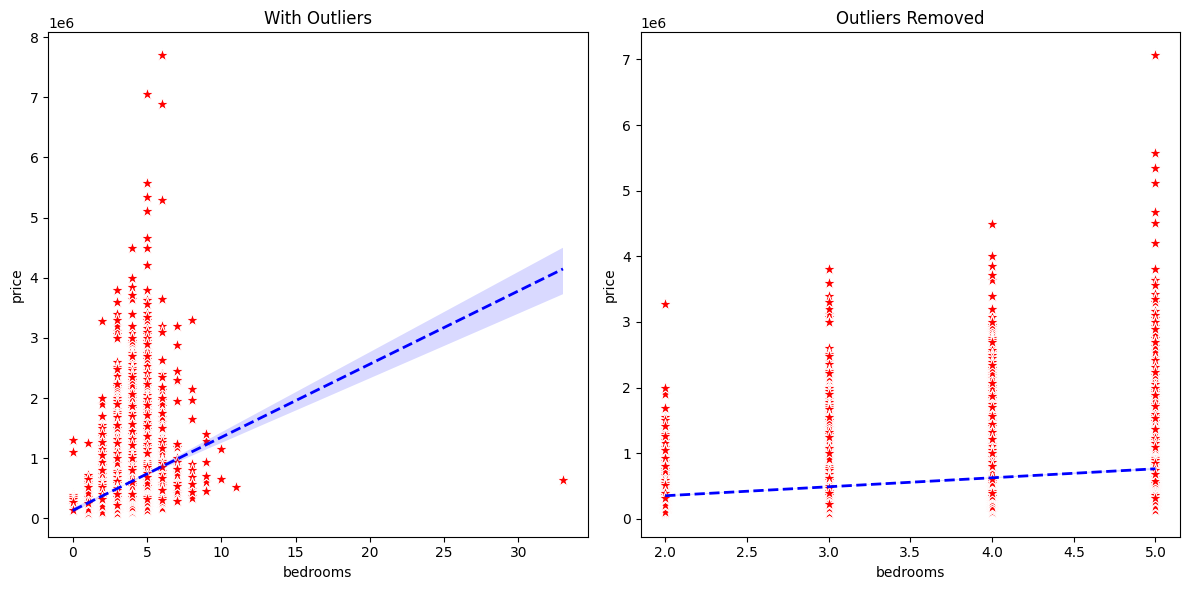

In [68]:

Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
data_no_outliers = df[(df['bedrooms'] >= lower_bound) & (df['bedrooms'] <= upper_bound)]

# Now you can use train_data_no_outliers for plotting or further analysis



fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: With outliers
sns.scatterplot(x=df['bedrooms'], y=df['price'], ax=axes[0], color='red', marker='*', s=100)
sns.regplot(x='bedrooms', y='price', data=df, ax=axes[0], scatter=False, color='blue', line_kws={'linestyle': '--', 'linewidth': 2})

axes[0].set_title("With Outliers")
axes[0].set_xlabel("bedrooms")
axes[0].set_ylabel("price")

# Plot 2: Outliers removed
sns.scatterplot(x=data_no_outliers['bedrooms'], y=data_no_outliers['price'], ax=axes[1], color='red', marker='*', s=100)
sns.regplot(x='bedrooms', y='price', data=data_no_outliers, ax=axes[1], scatter=False, color='blue', line_kws={'linestyle': '--', 'linewidth': 2})

axes[1].set_title("Outliers Removed")
axes[1].set_xlabel("bedrooms")
axes[1].set_ylabel("price")

plt.tight_layout()
plt.show()

# Hypothesis Generation

In [69]:
# a hypothesis test to determine whether the average house price is less than a specific value using a z-test.

value = 540088
# Print the null and alternative hypotheses
print("H0: Average House price price is %s USD" % value)
print("H1: Average House price is less than %s USD" % value)


# Perform the one-sample z-test
a, p_value = weightstats.ztest(df['price'], value=value, alternative="smaller")
print("p-value = ", round(p_value, 4))

# Compare p-value with alpha to make a decision
alpha = 0.05
if p_value < alpha:
    print("Null hypothesis rejected")
    print("The average house price is statistically less than %s USD." % value)
else:
    print("Null hypothesis cannot be rejected")
    print("The average house price is statistically greater than or equal to %s USD." % value)


H0: Average House price price is 540088 USD
H1: Average House price is less than 540088 USD
p-value =  0.5
Null hyphothesis cannot be rejected
The correlation is not statistically significant.


In [70]:
#hypothesis test between the 'sqft_living' and 'price' variables in your dataset.

# Calculate Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])

# Print the results
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

# Compare p-value with alpha to make a decision
if p_value < 0.05:
    print("Null hypothesis rejected")
    print("The correlation is statistically significant.")
else:
    print("Null hypothesis cannot be rejected")
    print("The correlation is not statistically significant.")

The Pearson Correlation Coefficient is 0.7020350546118002  with a P-value of P = 0.0
Null hypothesis rejected
The correlation is statistically significant.


In [71]:

#performing a Pearson correlation coefficient test between the 'yr_built' and 'price' variables in  dataset

# Calculate Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df['yr_built'], df['price'])

# Print the results
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

# Compare p-value with alpha to make a decision
if p_value < 0.05:
    print("Null hypothesis rejected")
    print("The correlation is statistically significant.")

else:
    print("Null hypothesis cannot be rejected")
    print("The correlation is not statistically significant.")

The Pearson Correlation Coefficient is 0.05401153149479271  with a P-value of P = 1.9298728094027856e-15
Null hypothesis rejected
The correlation is statistically significant.


In [72]:

X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = 0)

# RFE

In [73]:
base_model = LinearRegression()
# Create RFE with the base model and desired number of features
num_features_to_select = 30
rfe = RFE(estimator=base_model, n_features_to_select=num_features_to_select)
# Fit RFE to the training data
rfe.fit(X_train, y_train)
# Transform the training data to include only the selected features
selected_features_train = rfe.transform(X_train)
selected_features_test = rfe.transform(X_test)
# Fit a model on the selected features
selected_model = LinearRegression()
selected_model.fit(selected_features_train, y_train)
# Evaluate the model on the test data
accuracy = selected_model.score(selected_features_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.687575406727776
